In [1]:
using Pkg; Pkg.activate("../.")

  Activating environment at `~/Research/ASC-idealised/Project.toml`


In [2]:
using JLD2, CairoMakie, Oceananigans

┌ Info: Oceananigans will use 4 threads
└ @ Oceananigans /Users/navid/.julia/packages/Oceananigans/6tb8L/src/Oceananigans.jl:251


In [3]:
file = jldopen("asc_channel_east_slice.jld2")

JLDFile /Users/navid/Research/ASC-idealised/ASC_outputs/asc_channel_east_slice.jld2 (read-only)
 ├─📂 grid
 │  ├─📂 underlying_grid
 │  │  ├─🔢 Nx
 │  │  ├─🔢 Ny
 │  │  ├─🔢 Nz
 │  │  ├─🔢 Hx
 │  │  ├─🔢 Hy
 │  │  └─ ⋯ (16 more entries)
 │  └─📂 immersed_boundary (1 entry)
 └─ ⋯ (4 more entries)

We load the "serialized" version of the grid from the output file. This returns an Oceananigans grid.

In [4]:
grid = file["serialized/grid"]

128×128×16 ImmersedBoundaryGrid{Float64, Periodic, Bounded, Bounded} on CPU with 3×3×3 halo:
├── immersed_boundary: GridFittedBottom{OffsetArrays.OffsetMatrix{Float64, Matrix{Float64}}}
├── underlying_grid: 128×128×16 RectilinearGrid{Float64, Periodic, Bounded, Bounded} on CPU with 3×3×3 halo
├── Periodic x ∈ [-500000.0, 500000.0) regularly spaced with Δx=7812.5
├── Bounded  y ∈ [-500000.0, 500000.0] regularly spaced with Δy=7812.5
└── Bounded  z ∈ [-3000.0, 0.0]        regularly spaced with Δz=187.5

In [5]:
xc, yc, zc = nodes((Center, Center, Center), grid);

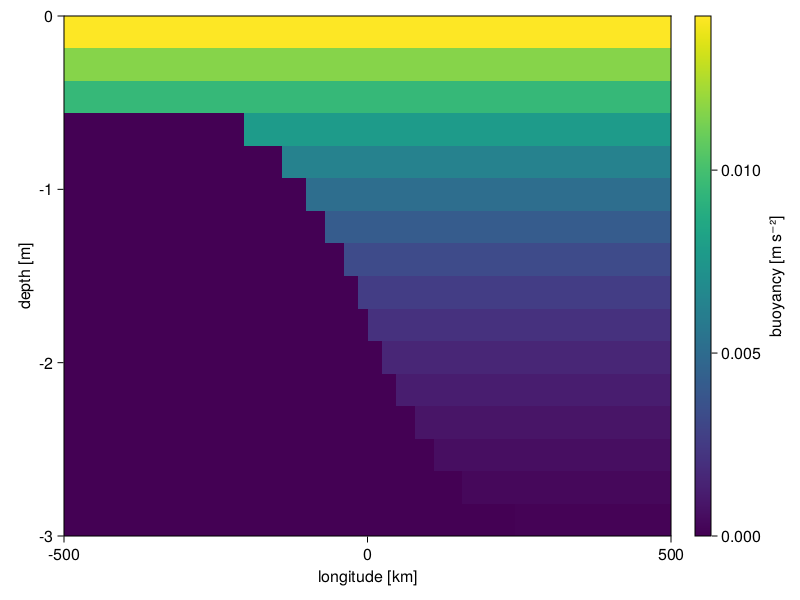

In [6]:
fig, ax, hm = heatmap(yc / 1e3, zc / 1e3, file["timeseries/b/0"][1, :, :])
Colorbar(fig[1, 2], hm, label="buoyancy [m s⁻²]")
ax.xlabel = "longitude [km]"
ax.ylabel = "depth [m]"
fig